In [2]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [16]:
# X shape (60,000 28x28), y shape (10,000, )
(x_train, _), (x_test, y_test) = mnist.load_data()

# data pre-processing
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [17]:
ecoding_dim=2
input_img=Input(shape=(784,))

In [18]:
# encoder layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(ecoding_dim)(encoded)

# decoder layers
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

# construct the autoencoder model
autoencoder = Model(input=input_img, output=decoded)

# construct the encoder model for plotting
encoder = Model(input=input_img, output=encoder_output)

autoencoder.compile(optimizer='adam', loss='mse')

/Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/envpy3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
/Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/envpy3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [19]:
# training
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256,shuffle=True)

Epoch 1/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0684
Epoch 2/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0559
Epoch 3/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0522
Epoch 4/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0486
Epoch 5/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0467
Epoch 6/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0454
Epoch 7/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0445
Epoch 8/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0437
Epoch 9/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0430
Epoch 10/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0426
Epoch 11/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0422
Epoch 12/20
60000/60000 [===========================

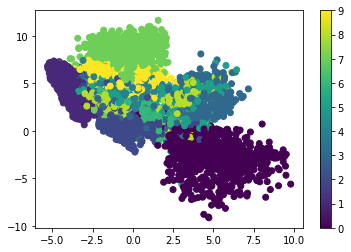

In [21]:
encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()